In [1]:
import os
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats as st


## DATA: citibike 201707
### IDEA
#### Women riders prefer longer rides than men riders
### NULL HYPOTHESIS:
#### the percentage of women riding more than 30 minutes is the same or lower than men

_$H_0$ :  $\frac{W{\mathrm{trip duration > 30 minutes}}}{W{\mathrm{trip duration}}}  <=  \frac{M{\mathrm{trip duration > 30 minutes}}}{M_{\mathrm{trip duration}}}$


_$H_1$ : $\frac{W{\mathrm{trip duration > 30 minutes}}}{W{\mathrm{trip duration}}}  >  \frac{M{\mathrm{trip duration > 30 minutes}}}{M_{\mathrm{trip duration}}}$

significant level : 
![alpha = 0.5](https://render.githubusercontent.com/render/math?math=%5Calpha%3D0.05&mode=inline)

In [2]:
df = pd.read_csv(os.getenv("PUIDATA")+'/201707-citibike-tripdata.csv')

In [3]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,364,2017-07-01 00:00:00,2017-07-01 00:06:05,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,14744,Subscriber,1986.0,1
1,2142,2017-07-01 00:00:03,2017-07-01 00:35:46,293,Lafayette St & E 8 St,40.730207,-73.991026,3425,2 Ave & E 104 St,40.789210,-73.943708,19587,Subscriber,1981.0,1
2,328,2017-07-01 00:00:08,2017-07-01 00:05:37,3242,Schermerhorn St & Court St,40.691029,-73.991834,3397,Court St & Nelson St,40.676395,-73.998699,27937,Subscriber,1984.0,2
3,2530,2017-07-01 00:00:11,2017-07-01 00:42:22,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,26066,Subscriber,1985.0,1
4,2534,2017-07-01 00:00:15,2017-07-01 00:42:29,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,29408,Subscriber,1982.0,2


In [4]:
df.shape

(1735599, 15)

In [5]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [6]:
sum(df['gender'].isin([1,2]))

1500405

In [7]:
df1 = df[df['gender'].isin([1,2])][['tripduration', 'gender']]

In [8]:
df1.head()

,tripduration,gender
0,364,1
1,2142,1
2,328,2
3,2530,1
4,2534,2


In [9]:
df1.shape

(1500405, 2)

In [10]:
df1['trip_minutes'] = round(df1['tripduration']/60, 1)
df1['trip_more_than_30_min'] = (df1['trip_minutes']>30).astype(int)

In [11]:
df1.head()

,tripduration,gender,trip_minutes,trip_more_than_30_min
0,364,1,6.1,0
1,2142,1,35.7,1
2,328,2,5.5,0
3,2530,1,42.2,1
4,2534,2,42.2,1


{'boxes': [<matplotlib.lines.Line2D at 0x10e5a3c88>],
 'caps': [<matplotlib.lines.Line2D at 0x10e5b2fd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x10e5c4f28>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x10e5c40b8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x10cfa7780>,
  <matplotlib.lines.Line2D at 0x10e5b2e48>]}

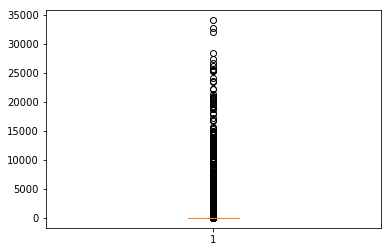

In [12]:
plt.boxplot(df1.trip_minutes)

In [13]:
df1.describe()

,tripduration,gender,trip_minutes,trip_more_than_30_min
count,1.500405e+06,1.500405e+06,1.500405e+06,1.500405e+06
mean,9.326058e+02,1.267275e+00,1.554343e+01,7.254308e-02
std,8.872451e+03,4.425373e-01,1.478742e+02,2.593851e-01
min,6.100000e+01,1.000000e+00,1.000000e+00,0.000000e+00
25%,3.720000e+02,1.000000e+00,6.200000e+00,0.000000e+00
50%,6.160000e+02,1.000000e+00,1.030000e+01,0.000000e+00
75%,1.052000e+03,2.000000e+00,1.750000e+01,0.000000e+00
max,2.045674e+06,2.000000e+00,3.409460e+04,1.000000e+00


In [14]:
## there are significant outliers in trip duration 
## the limit time of citibike, out of which the riders will be charged extra fees, is 45 minutes
## check the tradition definition of outlier and the quantile 
int(np.mean(df1.trip_minutes) + 3 * np.std(df1.trip_minutes)), \
int(df1.trip_minutes.quantile(0.9)), int(df1.trip_minutes.quantile(0.95)),\
int(df1.trip_minutes.quantile(0.99)), int(df1.trip_minutes.quantile(0.995)),\
int(df1.trip_minutes.quantile(0.999))

(459, 27, 33, 48, 67, 253)

In [15]:
## select 99.5% above as outlier. In other words, 60-120 minutes also makes sense.
outlier = df1.trip_minutes.quantile(0.995)
df2 = df1[(df1.trip_minutes < outlier) & (df1.trip_minutes > 1)]
int(outlier), df2.shape

(67, (1492260, 4))

{'boxes': [<matplotlib.lines.Line2D at 0x11053e1d0>],
 'caps': [<matplotlib.lines.Line2D at 0x11eef1ba8>,
 'fliers': [<matplotlib.lines.Line2D at 0x11eef8dd8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11eef85c0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11053eb38>,
  <matplotlib.lines.Line2D at 0x11053ed30>]}

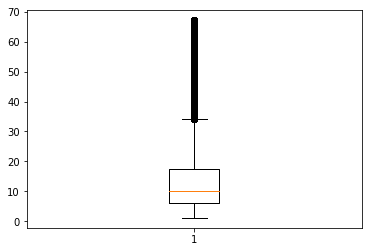

In [16]:
plt.boxplot(df2.trip_minutes)

In [17]:
df2.trip_minutes.describe()

count    1.492260e+06
mean     1.308292e+01
std      9.513486e+00
min      1.100000e+00
25%      6.200000e+00
50%      1.020000e+01
75%      1.740000e+01
max      6.720000e+01
Name: trip_minutes, dtype: float64

In [18]:
df2_m = df2[df2.gender == 1]
df2_m_count = df2_m.groupby(pd.cut(df2_m.trip_minutes, [0,10,20,30,40,50,60, 120]))[['trip_minutes']].count().\
                                    rename(columns = {'trip_minutes':'men'})
df2_w = df2[df2.gender == 2]
df2_w_count = df2_w.groupby(pd.cut(df2_w.trip_minutes, [0,10,20,30,40,50,60, 120]))[['trip_minutes']].count().\
                                    rename(columns = {'trip_minutes':'women'})
duration = pd.concat([df2_m_count, df2_w_count], axis =1).reset_index()
duration['men_prop'] = duration.men/duration.men.sum()
duration['women_prop'] = duration.women/duration.women.sum()
duration

,trip_minutes,men,women,men_prop,women_prop
0,"(0, 10]",565838,168628,0.517243,0.423358
1,"(10, 20]",332625,135205,0.304059,0.339446
2,"(20, 30]",128129,60501,0.117125,0.151894
3,"(30, 40]",49425,24518,0.045180,0.061555
4,"(40, 50]",13721,7282,0.012543,0.018282
5,"(50, 60]",3209,1610,0.002933,0.004042
6,"(60, 120]",1002,567,0.000916,0.001424


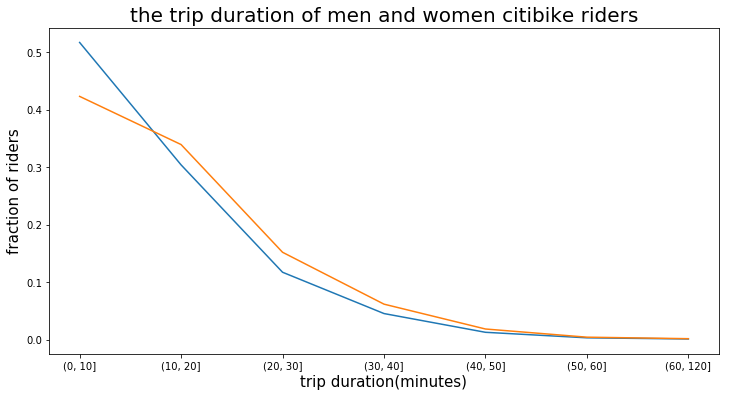

In [19]:
plt.figure(figsize = (12,6))
plt.plot(duration.men_prop, label = 'men')
plt.plot(duration.women_prop, label = 'women')
plt.xticks(np.arange(7),
           ('(0, 10]','(10, 20]','(20, 30]','(30, 40]','(40, 50]','(50, 60]','(60, 120]'))
plt.xlabel('trip duration(minutes)', fontsize = 15)
plt.ylabel('fraction of riders', fontsize = 15)
plt.title('the trip duration of men and women citibike riders', fontsize = 20)

## From above plot, we could see higher proportion of women than men ride more than 10 minutes.
## Use 30-minute as the long-trip threshold to test my hypothesis

In [20]:
df_count = df2.groupby(by = ['gender',
                  'trip_more_than_30_min'])[['trip_minutes']].count().\
                                    rename(columns = {'trip_minutes':'n'}).reset_index()
df_count

,gender,trip_more_than_30_min,n
0,1,0,1026592
1,1,1,67357
2,2,0,364334
3,2,1,33977


In [21]:
# gender = 2 means woman, 1 means men
count_w = list(df_count.n[df_count.gender == 2 ])
count_m = list(df_count.n[df_count.gender == 1 ])
error_w = np.sqrt(count_w)
error_m = np.sqrt(count_m)

In [22]:
Cont = pd.DataFrame([count_w, count_m, list(np.array(count_w) + np.array(count_m))], 
             columns = ['less_than_30_min', 'more_than_30_min'], index = ['W', 'M', 'total'])
Cont['Sum'] = Cont.iloc[:,0] + Cont.iloc[:,1]
Cont

,less_than_30_min,more_than_30_min,Sum
W,364334,33977,398311
M,1026592,67357,1093949
total,1390926,101334,1492260


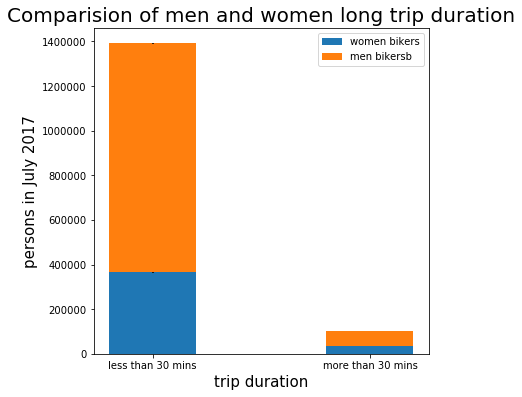

In [23]:
plt.figure(figsize = (6,6))
plt.bar(np.arange(2), count_w, tick_label = ('less than 30 mins', 'more than 30 mins'), 
        yerr  = [error_w, error_w], width = 0.4,label = 'women bikers')
plt.bar(np.arange(2), count_m, bottom = count_w,  
        yerr  = [error_m, error_m],width = 0.4,label = 'men bikersb')

plt.legend()
plt.xlabel('trip duration', fontsize = 15)
plt.ylabel('persons in July 2017', fontsize = 15)
plt.title('Comparision of men and women long trip duration', fontsize = 20)


In [24]:
frac_w = count_w/sum(count_w)
frac_m = count_m/sum(count_m)
error_frac_w = error_w/sum(count_w)
error_frac_m = error_m/sum(count_m)

In [25]:
type(frac_w)

numpy.ndarray

In [26]:
Frac = pd.DataFrame([frac_w, frac_m], 
             columns = ['less_than_30_min', 'more_than_30_min'], index = ['W', 'M'])
Frac

,less_than_30_min,more_than_30_min
W,0.914697,0.085303
M,0.938428,0.061572


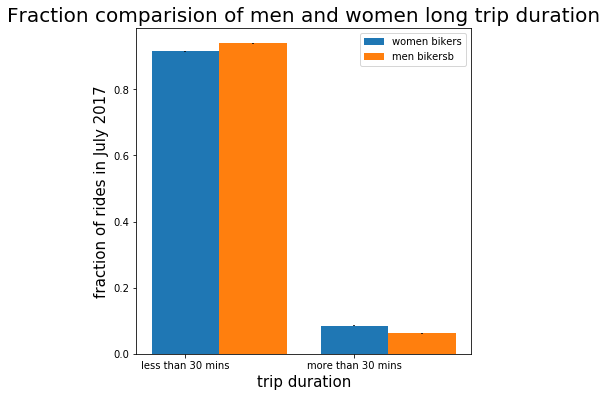

In [27]:
plt.figure(figsize = (6,6))
plt.bar(np.arange(2),  frac_w, yerr = [error_frac_w, error_frac_w], width = 0.4,
        tick_label  = ('less than 30 mins', 'more than 30 mins'), label = 'women bikers')
plt.bar(np.arange(2)+ 0.4, frac_m ,yerr = [error_frac_m, error_frac_m],  width = 0.4,
         label = 'men bikersb')
plt.legend()
plt.xlabel('trip duration', fontsize = 15)
plt.ylabel('fraction of rides in July 2017', fontsize = 15)
plt.title('Fraction comparision of men and women long trip duration', fontsize = 20)

In [28]:
print('Men: short duration(<=30 minutes): {}, long duration(>30mins):{},short duration error:{},long duration error:{}'\
      .format(round(frac_m[0],3), round(frac_m[1],3), 
              round(error_frac_m[0],4), round(error_frac_m[1],4)))
print('')
print('Women: short duration(<=30 minutes): {}, long duration(>30mins):{},short duration error:{},long duration error:{}'\
      .format(round(frac_w[0],3), round(frac_w[1],3), 
              round(error_frac_w[0],4), round(error_frac_w[1],4)))

Men: short duration(<=30 minutes): 0.938, long duration(>30mins):0.062,short duration error:0.0009,long duration error:0.0002

Women: short duration(<=30 minutes): 0.915, long duration(>30mins):0.085,short duration error:0.0015,long duration error:0.0005


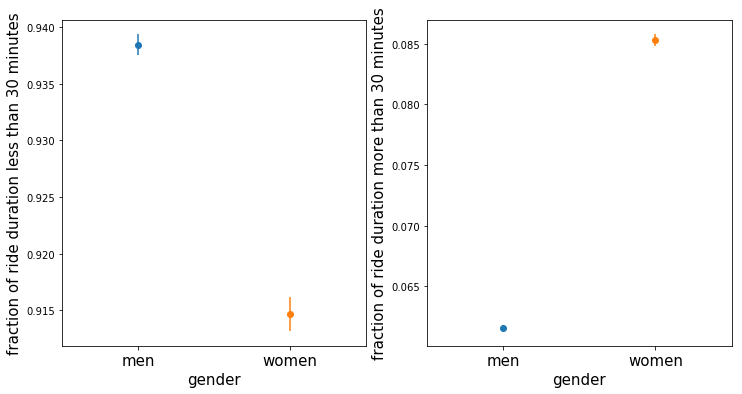

In [29]:
fig = plt.figure(figsize = (12, 6))
fig.add_subplot(121)
plt.errorbar([1], [frac_m[0]], yerr=[error_frac_m[0]], fmt='o', label='men')
plt.errorbar([2], [frac_w[0]], yerr=[error_frac_w[0]], fmt='o', label='women')
plt.xticks(np.arange(1,3), ('men', 'women'), fontsize = 15)
plt.xlabel('gender', fontsize = 15)
plt.xlim(0.5,2.5)
plt.ylabel('fraction of ride duration less than 30 minutes', fontsize = 15)

fig.add_subplot(122)
plt.errorbar([1], [frac_m[1]], yerr=[error_frac_m[1]], fmt='o', label='men')
plt.errorbar([2], [frac_w[1]], yerr=[error_frac_w[1]], fmt='o', label='women')
plt.xticks(np.arange(1,3), ('men', 'women'), fontsize = 15)
plt.xlabel('gender', fontsize = 15)
plt.xlim(0.5,2.5)
plt.ylabel('fraction of ride duration more than 30 minutes', fontsize = 15)

In [30]:
diff = Frac.iloc[0,1] - Frac.iloc[1,1]
print ("The long trip duration percentage of men and women are respectively {} and {}, and the difference is {}".\
       format(round(Frac.iloc[1,1],3), round(Frac.iloc[0,1],3),round(diff,3)))
if diff <= 0:
    # we are done...
    print("There is fewer percent of women riding for long trip duration. \
    In accordance with Null Hypothesis")
else:
    # morework to do
    print ("There is a higher proportion of women than men riding more than 30 minutes.")
    print("We must check the significance before we reject the Null Hypothesis")

The long trip duration percentage of men and women are respectively 0.062 and 0.085, and the difference is 0.024
There is a higher proportion of women than men riding more than 30 minutes.
We must check the significance before we reject the Null Hypothesis


## Compare Sample's difference betweence proportions, it's approriate to adopt t test to have a check
## And because the sample size is large enough, we could also use z statistics.



# $SE = \sqrt{\frac{p_1  ( 1 - p_1 )}{n_1} + \frac{p_2  ( 1 - p_2 )}{n_2} }$

In [31]:
Frac

,less_than_30_min,more_than_30_min
W,0.914697,0.085303
M,0.938428,0.061572


In [32]:
Cont

,less_than_30_min,more_than_30_min,Sum
W,364334,33977,398311
M,1026592,67357,1093949
total,1390926,101334,1492260


In [33]:
p1 = Frac.iloc[0,1]
p2 = Frac.iloc[1,1]
n1 = Cont.iloc[0,2]
n2 = Cont.iloc[1,2]
p1, p2, n1, n2

(0.085302690611105389, 0.061572340209644146, 398311, 1093949)

In [34]:
def standard_error(p1,p2,n1,n2):
    standard_error = np.sqrt(p1*(1-p1)/n1 + p2*(1-p2)/n2)
    return standard_error
SE = standard_error(p1,p2,n1,n2)
SE

0.00049870974926674463

## We could calculate the Z score or use the confidence interval to make a comparision

In [35]:
zscore = (p1 - p2)/SE
zscore

47.583490068826791

In [36]:
st.t.interval(0.95, df = len(df2)-2, loc = p1, scale = SE)

(0.084325236670994466, 0.086280144551216312)

In [37]:
p2 < st.t.interval(0.95, df = len(df2)-2, loc = p1, scale = SE)[0]

True

In [38]:
## p2 smaller than the lower bound of p1 interval at significant level 0.05, 
## means the probablity  of p2 being smaller than p1 is 95%
if p2 < st.t.interval(0.95, df = len(df2)-2, loc = p1, scale = SE)[0]:
    print('The proportion of men riding over 30 minutes is smaller than that of women at the significant level 0.05.')
    print('So we reject the null hypothesis that women has fewer percentage of longer trip duration')
else:
    print('We cannot reject the null hypothesis that women has fewer percentage of longer trip duration.\
    The hypothesis that women riders prefer longer rides than men riders has not been proved')

The proportion of men riding over 30 minutes is smaller than that of women at the significant level 0.05.
So we reject the null hypothesis that women has fewer percentage of longer trip duration



## We reject the null hypothesis at alpha = 0.05
## Women probably prefer long trip duration 

## Above result is based on Jul.2017 sample. We could have a recheck by selecting a winter month sample, like Dec.2016 . 

In [39]:
df_ = pd.read_csv(os.getenv("PUIDATA")+'/201612-citibike-tripdata.csv')

In [40]:
df_.columns

Index(['Trip Duration', 'Start Time', 'Stop Time', 'Start Station ID',
       'Start Station Name', 'Start Station Latitude',
       'Start Station Longitude', 'End Station ID', 'End Station Name',
       'End Station Latitude', 'End Station Longitude', 'Bike ID', 'User Type',
       'Birth Year', 'Gender'],
      dtype='object')

In [41]:
df1_ = df_[df_['Gender'].isin([1,2])][['Trip Duration','Gender']]
df1_.columns = ['tripduration', 'gender']
df1_['trip_minutes'] = round(df1_['tripduration']/60, 1)
df1_['trip_more_than_30_min'] = (df1_['trip_minutes']>30).astype(int)
df2_ = df1_[(df1_.trip_minutes < outlier) & (df1_.trip_minutes > 1)]
df_count_ = df2_.groupby(by = ['gender',
                  'trip_more_than_30_min'])[['trip_minutes']].count().\
                                    rename(columns = {'trip_minutes':'n'}).reset_index()
df_count_


,gender,trip_more_than_30_min,n
0,1,0,576408
1,1,1,19020
2,2,0,165464
3,2,1,7271


In [42]:
count_w_ = list(df_count_.n[df_count_.gender == 2 ])
count_m_ = list(df_count_.n[df_count_.gender == 1 ])
frac_w_ = list(count_w_/sum(count_w_))
frac_m_ = list(count_m_/sum(count_m_))

In [43]:
Cont_ = pd.DataFrame([count_w_, count_m_, list(np.array(count_w_) + np.array(count_m_))], 
             columns = ['less_than_30_min', 'more_than_30_min'], index = ['W', 'M', 'total'])
Cont_['Sum'] = Cont_.iloc[:,0] + Cont_.iloc[:,1]
Cont_

,less_than_30_min,more_than_30_min,Sum
W,165464,7271,172735
M,576408,19020,595428
total,741872,26291,768163


In [44]:
Frac_ = pd.DataFrame([frac_w_, frac_m_], 
             columns = ['less_than_30_min', 'more_than_30_min'], index = ['W', 'M'])
Frac_

,less_than_30_min,more_than_30_min
W,0.957907,0.042093
M,0.968057,0.031943


In [45]:
diff_ = Frac_.iloc[0,1] - Frac_.iloc[1,1]
print ("The long trip duration percentage of men and women are respectively {} and {}, and the difference is {}".\
       format(round(Frac_.iloc[1,1],3), round(Frac_.iloc[0,1],3),round(diff_,3)))
if diff_ <= 0:
    # we are done...
    print("There is fewer percent of women riding for long trip duration. \
    In accordance with Null Hypothesis")
else:
    # morework to do
    print ("There is a higher proportion of women than men riding more than 30 minutes.")
    print("We must check the significance before we reject the Null Hypothesis")

The long trip duration percentage of men and women are respectively 0.032 and 0.042, and the difference is 0.01
There is a higher proportion of women than men riding more than 30 minutes.
We must check the significance before we reject the Null Hypothesis


## t test

In [46]:
p1_ = Frac_.iloc[0,1]
p2_ = Frac_.iloc[1,1]
n1_ = Cont_.iloc[0,2]
n2_ = Cont_.iloc[1,2]
SE_ = standard_error(p1,p2,n1,n2)

p1_, p2_, n1_, n2_, SE_

(0.042093380032998527,
 0.031943408774864464,
 172735,
 595428,
 0.00049870974926674463)

In [47]:
zscore_ = (p1_ - p2_)/SE_
zscore_

20.352462074498476

In [48]:
if p2 < st.t.interval(0.95, df = len(df2)-2, loc = p1, scale = SE)[0]:
    print('The proportion of men riding over 30 minutes is smaller than that of women at the significant level 0.05.')
    print('So we reject the null hypothesis that women has fewer percentage of longer trip duration')
else:
    print('We cannot reject the null hypothesis that women has fewer percentage of longer trip duration.\
    The hypothesis that women riders prefer longer rides than men riders has not been proved')

The proportion of men riding over 30 minutes is smaller than that of women at the significant level 0.05.
So we reject the null hypothesis that women has fewer percentage of longer trip duration


## Conclusion: 
## Both the summer and winter sample prove that women riders prefer longer rides than men at significant level 0.05. My hypothesis is robust to seasonality